In [1]:
import numpy as np

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

# train/test 세트로 나누기

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state =42)

# 2차원으로 

In [5]:
train_input =train_input.reshape(-1, 1)
test_input = test_input.reshape(-1,1)

# 최근접 이웃 회귀 모델: 이웃 개수 3

In [6]:
from sklearn.neighbors import KNeighborsRegressor

In [7]:
knr = KNeighborsRegressor(n_neighbors=3)

In [8]:
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [9]:
knr.predict([[50]])  #길이 50cm 농어 무게 예측

array([1033.33333333])

# 훈련 세트, 50cm 농어의 최근접 이웃

In [10]:
import matplotlib.pyplot as plt

In [11]:
#50cm 농어의 이웃을 구하기
distances, indexes = knr.kneighbors([[50]])

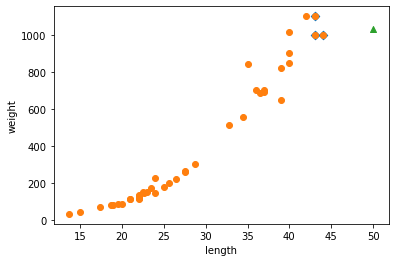

In [12]:
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(train_input, train_target)
plt.scatter(50, 1033, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [14]:
np.mean(train_target[indexes])

1033.3333333333333

K-최근접 이웃 '회귀': 가장 가까운 샘플을 찾아 타깃을 평균합니다. 

따라서 새로운 샘플이 훈련 세트의 범위를 벗어나면: 엉뚱한 값을 예측 할 수도!

In [15]:
#길이 100cm 농어 무게 예측
knr.predict([[100]])

array([1033.33333333])

In [17]:
distances, indexes =knr.kneighbors([[100]])

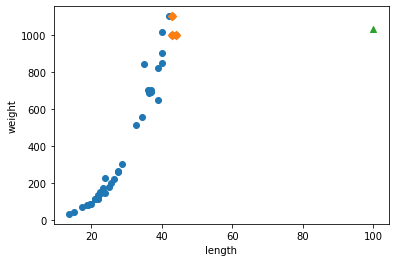

In [23]:
plt.scatter(train_input, train_target)
#이웃 샘플들 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
#100cm 농어 데이터
plt.scatter(100, 1033, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

농어가 아무리 커도 무게가 더 늘어지 않아!
solution: 가장 큰 농어가 포함되도록 훈련 세트를 다시 만들어야 해 

# 선형 회귀

특성이 하나인 경우 직선을 학습하는 알고리즘

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [25]:
lr.fit(train_input, train_target)

LinearRegression()

In [26]:
lr.predict([[50]])

array([1241.83860323])

In [27]:
#기울기와 절편
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


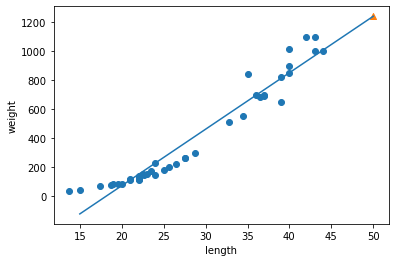

In [32]:
plt.scatter(train_input, train_target)
plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_+lr.intercept_])

plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 결정계수 점수 확인

In [33]:
lr.score(train_input, train_target)

0.9398463339976041

In [34]:
lr.score(test_input, test_target)

0.8247503123313559

# 다항 회귀

In [38]:
train_poly = np.column_stack((train_input**2, train_input))

In [37]:
test_poly = np.column_stack((test_input**2, test_input))

In [39]:
train_poly.shape

(42, 2)

In [44]:
test_poly.shape

(14, 2)

In [46]:
lr=LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [47]:
lr.predict([[50**2, 50]])

array([1573.98423528])

In [48]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


## 다항 회귀 산점도 그리기

In [52]:
point = np.arange(15, 50) #15에서 49까지 정수 배열

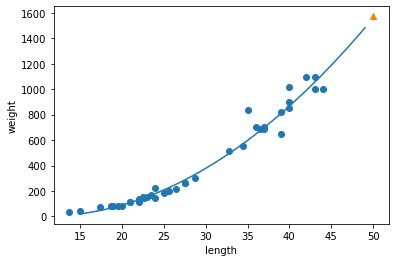

In [58]:
plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2-21.6*point+116.05) #15에서 49까지 2차 방정식 그래프

plt.scatter(50, 1574, marker='^') #50cm 농어 데이터

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [59]:
lr.score(train_poly, train_target)

0.9706807451768623

In [60]:
lr.score(test_poly, test_target) #여전히 테스트 세트 점수가 좀더 높아 -> 과소적합

0.9775935108325121